# **Indoor localization with RSS and deep learning**
Neha Maiya

John Cyrus Kandikatla


# Imports

In [0]:
# Imports

# necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix

#Scoring Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



import tensorflow as tf
from keras.models import Sequential
from keras.layers import *

In [0]:
import json
import csv
import pandas as pd
import numpy as np 
import os
from scipy.stats import zscore               # min max scaler


from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
# imports for tf and other models

import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32, np.object):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)
    
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
from sklearn.metrics import r2_score

In [0]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
import os
import json
import csv
import pandas as pd
import sklearn.feature_extraction.text as tfidf
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import zscore
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import f1_score
import collections
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras import optimizers
from keras.layers import Conv1D, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load Data

In [0]:
# Loading raw data 
# Cyrus path

# train_data = pd.read_csv("drive/My Drive/275_Project/Indoor_Loc/Indoor_Loc_Original/trainingData2.csv")
# val_data = pd.read_csv("drive/My Drive/275_Project/Indoor_Loc/Indoor_Loc_Original/validationData2.csv")

In [0]:
# Neha's path
train_data = pd.read_csv("drive/My Drive/UJLoc/trainingData2.csv")


# Knowing the Raw Data

In [0]:
# Dataset shape
train_data.shape

((19937, 529), (1111, 529))

In [0]:
train_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-110,-110,-110,-110,-110,-110,-110,-97,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-92,-110,-110,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [0]:
# Datatypes in the dataset
list(train_data.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'

In [0]:
# Number of unique spaces in the dataset
print(sorted(train_data['SPACEID'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 25, 26, 27, 28, 29, 30, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 253, 254]


In [0]:
# Space distribution
from collections import Counter
print(Counter(train_data['SPACEID']))

Counter({202: 484, 106: 475, 107: 469, 104: 439, 102: 418, 101: 418, 201: 418, 103: 415, 108: 385, 105: 366, 203: 348, 110: 334, 122: 318, 112: 318, 111: 318, 140: 308, 129: 296, 126: 296, 128: 293, 109: 291, 113: 289, 206: 288, 121: 275, 125: 265, 127: 264, 120: 263, 117: 261, 118: 261, 124: 260, 119: 258, 136: 257, 204: 256, 216: 254, 214: 250, 130: 243, 133: 239, 114: 234, 115: 229, 207: 217, 132: 217, 217: 216, 208: 214, 116: 211, 205: 210, 134: 206, 209: 204, 139: 200, 224: 193, 218: 178, 137: 174, 211: 169, 222: 169, 210: 167, 131: 167, 123: 166, 212: 159, 215: 157, 135: 157, 138: 152, 219: 148, 220: 141, 143: 140, 213: 139, 225: 129, 230: 129, 223: 125, 235: 121, 229: 118, 227: 118, 248: 110, 231: 110, 226: 108, 247: 100, 221: 100, 228: 99, 234: 99, 3: 97, 4: 95, 10: 89, 141: 86, 2: 80, 236: 80, 237: 80, 6: 79, 244: 70, 1: 65, 5: 60, 9: 60, 233: 60, 238: 59, 8: 56, 241: 55, 243: 49, 16: 42, 246: 40, 245: 40, 239: 40, 232: 39, 13: 39, 7: 38, 15: 30, 242: 30, 249: 30, 17: 24, 26: 

In [0]:
print(list(train_data))

['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012', 'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018', 'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024', 'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030', 'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036', 'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042', 'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048', 'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054', 'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060', 'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066', 'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072', 'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078', 'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084', 'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP090', 'WAP091', 'WAP092', 'WAP093', 'WAP094', 'WAP095', 'WAP096', 'WAP097', 'WAP098', 'WAP099', 'WAP100',

In [0]:
feature_list = list(train_data)

In [0]:
#Drop unneeded data
train_data.drop(['USERID', 'PHONEID', 'TIMESTAMP'], axis = 1, inplace=True)

#Remove "NaN" value
col = train_data.columns[0:520]
for i in col:
    train_data[i].fillna(0, inplace=True)
train_data.dropna(subset=['LONGITUDE','LATITUDE', 'FLOOR', 'BUILDINGID' ], inplace=True)
#trainingData.isnull().sum()



#Process "WAP" data
train_data.iloc[:, 0:520] = np.where(train_data.iloc[:, 0:520] <= 0, 
                        train_data.iloc[:, 0:520] + 105, 
                        train_data.iloc[:, 0:520] - 100)

#Process Longtitude
train_data.iloc[:, 520] = np.where(train_data.iloc[:, 520] <= 0, 
                        -train_data.iloc[:, 520], 
                        train_data.iloc[:, 520])


train_data.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.0,19937.000000,19937.000000,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000
mean,-4.986758,-4.978934,-5.0,-5.0,-4.964940,-4.625320,-4.178161,-4.048804,-4.038822,-4.919848,0.280684,0.319657,-1.401364,-1.448262,-3.775944,-3.850278,-4.915233,-4.907559,-4.270602,-4.314892,-4.970708,-4.970206,-3.729347,-3.721272,-3.979887,-3.946381,-3.730451,-3.672368,-2.117520,-2.069218,-3.907609,-3.898179,-2.043587,-2.045443,-1.500426,-1.523700,-3.678588,-3.906255,-2.111000,-2.079400,...,-5.0,-5.0,-0.783167,-4.989216,-5.0,-4.831870,-4.847369,-4.888248,0.802729,3.028038,-5.0,-4.826554,-4.840046,-4.884737,1.238752,2.809199,-2.381552,-4.928324,-4.997492,-4.968451,-4.998596,-4.915634,-4.993429,-4.999348,-2.613733,-4.985655,-4.823143,-4.839494,-4.931484,0.705472,2.742037,-4.979636,-4.997893,-5.0,7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024
std,0.441757,0.684879,0.0,0.0,0.787725,3.165315,5.142137,5.377603,5.758299,1.235671,13.653428,13.702120,11.414361,11.336870,5.524116,5.182456,1.326827,1.404080,5.178394,5.043188,0.684942,0.696396,6.870650,6.882921,5.960919,6.020354,6.692706,6.828713,10.731342,10.737124,6.637490,6.655924,10.757913,10.761125,11.631300,11.557712,6.757095,6.206089,10.753628,10.741521,...,0.0,0.0,12.172037,0.444371,0.0,2.243173,2.005867,1.610481,14.517513,15.489575,0.0,2.267856,2.036866,1.622183,15.030209,15.198915,8.751245,1.250734,0.250388,0.811953,0.140575,1.244734,0.386633,0.092069,8.705512,0.557575,2.286800,2.049674,1.271256,14.614427,15.369901,0.624528,0.172600,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964
min,-5.000000,-5.000000,-5.0,-5.0,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.0,-5.0,-5.000000,-5.000000,-5.0,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.0,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.0,7300.818990,4.864746e+06,0.000000,0.000000,1.000000,1.000000
25%,-5.000000,-5.000000,-5.0,-5.0,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.00

In [0]:
min_LGT = 7300.818990
min_LAT = 4.864746e+06

train_data.iloc[:,520] = (train_data.iloc[:, 520] - min_LGT + 1)
train_data.iloc[:,521] = (train_data.iloc[:, 521] - min_LAT + 1)

In [0]:
# Splitting the dataset into x and y

out_data = train_data.copy()
out_data = out_data.drop(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012', 'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018', 'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024', 'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030', 'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036', 'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042', 'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048', 'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054', 'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060', 'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066', 'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072', 'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078', 'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084', 'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP090', 'WAP091', 'WAP092', 'WAP093', 'WAP094', 'WAP095', 'WAP096', 'WAP097', 'WAP098', 'WAP099', 'WAP100', 'WAP101', 'WAP102', 'WAP103', 'WAP104', 'WAP105', 'WAP106', 'WAP107', 'WAP108', 'WAP109', 'WAP110', 'WAP111', 'WAP112', 'WAP113', 'WAP114', 'WAP115', 'WAP116', 'WAP117', 'WAP118', 'WAP119', 'WAP120', 'WAP121', 'WAP122', 'WAP123', 'WAP124', 'WAP125', 'WAP126', 'WAP127', 'WAP128', 'WAP129', 'WAP130', 'WAP131', 'WAP132', 'WAP133', 'WAP134', 'WAP135', 'WAP136', 'WAP137', 'WAP138', 'WAP139', 'WAP140', 'WAP141', 'WAP142', 'WAP143', 'WAP144', 'WAP145', 'WAP146', 'WAP147', 'WAP148', 'WAP149', 'WAP150', 'WAP151', 'WAP152', 'WAP153', 'WAP154', 'WAP155', 'WAP156', 'WAP157', 'WAP158', 'WAP159', 'WAP160', 'WAP161', 'WAP162', 'WAP163', 'WAP164', 'WAP165', 'WAP166', 'WAP167', 'WAP168', 'WAP169', 'WAP170', 'WAP171', 'WAP172', 'WAP173', 'WAP174', 'WAP175', 'WAP176', 'WAP177', 'WAP178', 'WAP179', 'WAP180', 'WAP181', 'WAP182', 'WAP183', 'WAP184', 'WAP185', 'WAP186', 'WAP187', 'WAP188', 'WAP189', 'WAP190', 'WAP191', 'WAP192', 'WAP193', 'WAP194', 'WAP195', 'WAP196', 'WAP197', 'WAP198', 'WAP199', 'WAP200', 'WAP201', 'WAP202', 'WAP203', 'WAP204', 'WAP205', 'WAP206', 'WAP207', 'WAP208', 'WAP209', 'WAP210', 'WAP211', 'WAP212', 'WAP213', 'WAP214', 'WAP215', 'WAP216', 'WAP217', 'WAP218', 'WAP219', 'WAP220', 'WAP221', 'WAP222', 'WAP223', 'WAP224', 'WAP225', 'WAP226', 'WAP227', 'WAP228', 'WAP229', 'WAP230', 'WAP231', 'WAP232', 'WAP233', 'WAP234', 'WAP235', 'WAP236', 'WAP237', 'WAP238', 'WAP239', 'WAP240', 'WAP241', 'WAP242', 'WAP243', 'WAP244', 'WAP245', 'WAP246', 'WAP247', 'WAP248', 'WAP249', 'WAP250', 'WAP251', 'WAP252', 'WAP253', 'WAP254', 'WAP255', 'WAP256', 'WAP257', 'WAP258', 'WAP259', 'WAP260', 'WAP261', 'WAP262', 'WAP263', 'WAP264', 'WAP265', 'WAP266', 'WAP267', 'WAP268', 'WAP269', 'WAP270', 'WAP271', 'WAP272', 'WAP273', 'WAP274', 'WAP275', 'WAP276', 'WAP277', 'WAP278', 'WAP279', 'WAP280', 'WAP281', 'WAP282', 'WAP283', 'WAP284', 'WAP285', 'WAP286', 'WAP287', 'WAP288', 'WAP289', 'WAP290', 'WAP291', 'WAP292', 'WAP293', 'WAP294', 'WAP295', 'WAP296', 'WAP297', 'WAP298', 'WAP299', 'WAP300', 'WAP301', 'WAP302', 'WAP303', 'WAP304', 'WAP305', 'WAP306', 'WAP307', 'WAP308', 'WAP309', 'WAP310', 'WAP311', 'WAP312', 'WAP313', 'WAP314', 'WAP315', 'WAP316', 'WAP317', 'WAP318', 'WAP319', 'WAP320', 'WAP321', 'WAP322', 'WAP323', 'WAP324', 'WAP325', 'WAP326', 'WAP327', 'WAP328', 'WAP329', 'WAP330', 'WAP331', 'WAP332', 'WAP333', 'WAP334', 'WAP335', 'WAP336', 'WAP337', 'WAP338', 'WAP339', 'WAP340', 'WAP341', 'WAP342', 'WAP343', 'WAP344', 'WAP345', 'WAP346', 'WAP347', 'WAP348', 'WAP349', 'WAP350', 'WAP351', 'WAP352', 'WAP353', 'WAP354', 'WAP355', 'WAP356', 'WAP357', 'WAP358', 'WAP359', 'WAP360', 'WAP361', 'WAP362', 'WAP363', 'WAP364', 'WAP365', 'WAP366', 'WAP367', 'WAP368', 'WAP369', 'WAP370', 'WAP371', 'WAP372', 'WAP373', 'WAP374', 'WAP375', 'WAP376', 'WAP377', 'WAP378', 'WAP379', 'WAP380', 'WAP381', 'WAP382', 'WAP383', 'WAP384', 'WAP385', 'WAP386', 'WAP387', 'WAP388', 'WAP389', 'WAP390', 'WAP391', 'WAP392', 'WAP393', 'WAP394', 'WAP395', 'WAP396', 'WAP397', 'WAP398', 'WAP399', 'WAP400', 'WAP401', 'WAP402', 'WAP403', 'WAP404', 'WAP405', 'WAP406', 'WAP407', 'WAP408', 'WAP409', 'WAP410', 'WAP411', 'WAP412', 'WAP413', 'WAP414', 'WAP415', 'WAP416', 'WAP417', 'WAP418', 'WAP419', 'WAP420', 'WAP421', 'WAP422', 'WAP423', 'WAP424', 'WAP425', 'WAP426', 'WAP427', 'WAP428', 'WAP429', 'WAP430', 'WAP431', 'WAP432', 'WAP433', 'WAP434', 'WAP435', 'WAP436', 'WAP437', 'WAP438', 'WAP439', 'WAP440', 'WAP441', 'WAP442', 'WAP443', 'WAP444', 'WAP445', 'WAP446', 'WAP447', 'WAP448', 'WAP449', 'WAP450', 'WAP451', 'WAP452', 'WAP453', 'WAP454', 'WAP455', 'WAP456', 'WAP457', 'WAP458', 'WAP459', 'WAP460', 'WAP461', 'WAP462', 'WAP463', 'WAP464', 'WAP465', 'WAP466', 'WAP467', 'WAP468', 'WAP469', 'WAP470', 'WAP471', 'WAP472', 'WAP473', 'WAP474', 'WAP475', 'WAP476', 'WAP477', 'WAP478', 'WAP479', 'WAP480', 'WAP481', 'WAP482', 'WAP483', 'WAP484', 'WAP485', 'WAP486', 'WAP487', 'WAP488', 'WAP489', 'WAP490', 'WAP491', 'WAP492', 'WAP493', 'WAP494', 'WAP495', 'WAP496', 'WAP497', 'WAP498', 'WAP499', 'WAP500', 'WAP501', 'WAP502', 'WAP503', 'WAP504', 'WAP505', 'WAP506', 'WAP507', 'WAP508', 'WAP509', 'WAP510', 'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519', 'WAP520'], axis = 1)

In [0]:
print(list(out_data))

['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION']


In [0]:
in_data = train_data.copy()
in_data = in_data.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION'], axis = 1)

In [0]:
print(list(in_data))

['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012', 'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018', 'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024', 'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030', 'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036', 'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042', 'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048', 'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054', 'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060', 'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066', 'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072', 'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078', 'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084', 'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP090', 'WAP091', 'WAP092', 'WAP093', 'WAP094', 'WAP095', 'WAP096', 'WAP097', 'WAP098', 'WAP099', 'WAP100',

In [0]:
in_data.shape, out_data.shape

((19937, 520), (19937, 6))

# Feature Importance


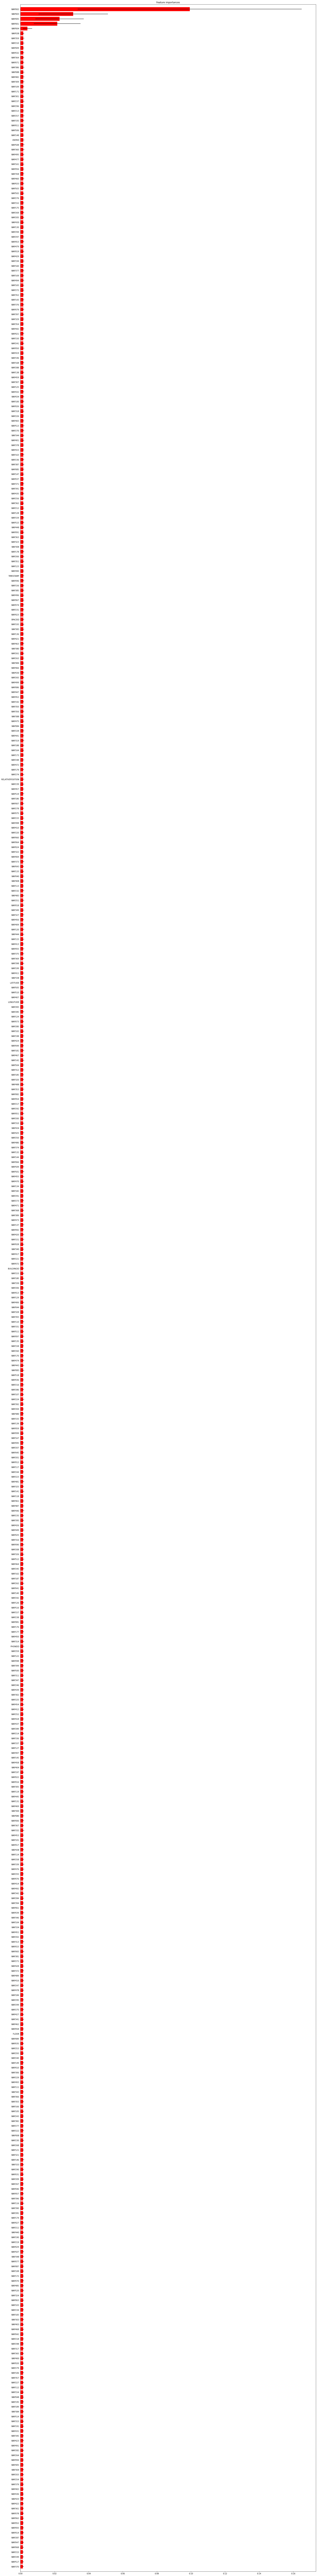

In [0]:
# Feature Importances

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

feature_names = ['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012', 'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018', 'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024', 'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030', 'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036', 'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042', 'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048', 'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054', 'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060', 'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066', 'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072', 'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078', 'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084', 'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP090', 'WAP091', 'WAP092', 'WAP093', 'WAP094', 'WAP095', 'WAP096', 'WAP097', 'WAP098', 'WAP099', 'WAP100', 'WAP101', 'WAP102', 'WAP103', 'WAP104', 'WAP105', 'WAP106', 'WAP107', 'WAP108', 'WAP109', 'WAP110', 'WAP111', 'WAP112', 'WAP113', 'WAP114', 'WAP115', 'WAP116', 'WAP117', 'WAP118', 'WAP119', 'WAP120', 'WAP121', 'WAP122', 'WAP123', 'WAP124', 'WAP125', 'WAP126', 'WAP127', 'WAP128', 'WAP129', 'WAP130', 'WAP131', 'WAP132', 'WAP133', 'WAP134', 'WAP135', 'WAP136', 'WAP137', 'WAP138', 'WAP139', 'WAP140', 'WAP141', 'WAP142', 'WAP143', 'WAP144', 'WAP145', 'WAP146', 'WAP147', 'WAP148', 'WAP149', 'WAP150', 'WAP151', 'WAP152', 'WAP153', 'WAP154', 'WAP155', 'WAP156', 'WAP157', 'WAP158', 'WAP159', 'WAP160', 'WAP161', 'WAP162', 'WAP163', 'WAP164', 'WAP165', 'WAP166', 'WAP167', 'WAP168', 'WAP169', 'WAP170', 'WAP171', 'WAP172', 'WAP173', 'WAP174', 'WAP175', 'WAP176', 'WAP177', 'WAP178', 'WAP179', 'WAP180', 'WAP181', 'WAP182', 'WAP183', 'WAP184', 'WAP185', 'WAP186', 'WAP187', 'WAP188', 'WAP189', 'WAP190', 'WAP191', 'WAP192', 'WAP193', 'WAP194', 'WAP195', 'WAP196', 'WAP197', 'WAP198', 'WAP199', 'WAP200', 'WAP201', 'WAP202', 'WAP203', 'WAP204', 'WAP205', 'WAP206', 'WAP207', 'WAP208', 'WAP209', 'WAP210', 'WAP211', 'WAP212', 'WAP213', 'WAP214', 'WAP215', 'WAP216', 'WAP217', 'WAP218', 'WAP219', 'WAP220', 'WAP221', 'WAP222', 'WAP223', 'WAP224', 'WAP225', 'WAP226', 'WAP227', 'WAP228', 'WAP229', 'WAP230', 'WAP231', 'WAP232', 'WAP233', 'WAP234', 'WAP235', 'WAP236', 'WAP237', 'WAP238', 'WAP239', 'WAP240', 'WAP241', 'WAP242', 'WAP243', 'WAP244', 'WAP245', 'WAP246', 'WAP247', 'WAP248', 'WAP249', 'WAP250', 'WAP251', 'WAP252', 'WAP253', 'WAP254', 'WAP255', 'WAP256', 'WAP257', 'WAP258', 'WAP259', 'WAP260', 'WAP261', 'WAP262', 'WAP263', 'WAP264', 'WAP265', 'WAP266', 'WAP267', 'WAP268', 'WAP269', 'WAP270', 'WAP271', 'WAP272', 'WAP273', 'WAP274', 'WAP275', 'WAP276', 'WAP277', 'WAP278', 'WAP279', 'WAP280', 'WAP281', 'WAP282', 'WAP283', 'WAP284', 'WAP285', 'WAP286', 'WAP287', 'WAP288', 'WAP289', 'WAP290', 'WAP291', 'WAP292', 'WAP293', 'WAP294', 'WAP295', 'WAP296', 'WAP297', 'WAP298', 'WAP299', 'WAP300', 'WAP301', 'WAP302', 'WAP303', 'WAP304', 'WAP305', 'WAP306', 'WAP307', 'WAP308', 'WAP309', 'WAP310', 'WAP311', 'WAP312', 'WAP313', 'WAP314', 'WAP315', 'WAP316', 'WAP317', 'WAP318', 'WAP319', 'WAP320', 'WAP321', 'WAP322', 'WAP323', 'WAP324', 'WAP325', 'WAP326', 'WAP327', 'WAP328', 'WAP329', 'WAP330', 'WAP331', 'WAP332', 'WAP333', 'WAP334', 'WAP335', 'WAP336', 'WAP337', 'WAP338', 'WAP339', 'WAP340', 'WAP341', 'WAP342', 'WAP343', 'WAP344', 'WAP345', 'WAP346', 'WAP347', 'WAP348', 'WAP349', 'WAP350', 'WAP351', 'WAP352', 'WAP353', 'WAP354', 'WAP355', 'WAP356', 'WAP357', 'WAP358', 'WAP359', 'WAP360', 'WAP361', 'WAP362', 'WAP363', 'WAP364', 'WAP365', 'WAP366', 'WAP367', 'WAP368', 'WAP369', 'WAP370', 'WAP371', 'WAP372', 'WAP373', 'WAP374', 'WAP375', 'WAP376', 'WAP377', 'WAP378', 'WAP379', 'WAP380', 'WAP381', 'WAP382', 'WAP383', 'WAP384', 'WAP385', 'WAP386', 'WAP387', 'WAP388', 'WAP389', 'WAP390', 'WAP391', 'WAP392', 'WAP393', 'WAP394', 'WAP395', 'WAP396', 'WAP397', 'WAP398', 'WAP399', 'WAP400', 'WAP401', 'WAP402', 'WAP403', 'WAP404', 'WAP405', 'WAP406', 'WAP407', 'WAP408', 'WAP409', 'WAP410', 'WAP411', 'WAP412', 'WAP413', 'WAP414', 'WAP415', 'WAP416', 'WAP417', 'WAP418', 'WAP419', 'WAP420', 'WAP421', 'WAP422', 'WAP423', 'WAP424', 'WAP425', 'WAP426', 'WAP427', 'WAP428', 'WAP429', 'WAP430', 'WAP431', 'WAP432', 'WAP433', 'WAP434', 'WAP435', 'WAP436', 'WAP437', 'WAP438', 'WAP439', 'WAP440', 'WAP441', 'WAP442', 'WAP443', 'WAP444', 'WAP445', 'WAP446', 'WAP447', 'WAP448', 'WAP449', 'WAP450', 'WAP451', 'WAP452', 'WAP453', 'WAP454', 'WAP455', 'WAP456', 'WAP457', 'WAP458', 'WAP459', 'WAP460', 'WAP461', 'WAP462', 'WAP463', 'WAP464', 'WAP465', 'WAP466', 'WAP467', 'WAP468', 'WAP469', 'WAP470', 'WAP471', 'WAP472', 'WAP473', 'WAP474', 'WAP475', 'WAP476', 'WAP477', 'WAP478', 'WAP479', 'WAP480', 'WAP481', 'WAP482', 'WAP483', 'WAP484', 'WAP485', 'WAP486', 'WAP487', 'WAP488', 'WAP489', 'WAP490', 'WAP491', 'WAP492', 'WAP493', 'WAP494', 'WAP495', 'WAP496', 'WAP497', 'WAP498', 'WAP499', 'WAP500', 'WAP501', 'WAP502', 'WAP503', 'WAP504', 'WAP505', 'WAP506', 'WAP507', 'WAP508', 'WAP509', 'WAP510', 'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519', 'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP']

# Build a classification task using 3 informative features
Xe, ye = make_classification(n_samples=19937,
                           n_features=529,
                           n_informative=5,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
plt.rcParams["figure.figsize"] = (28,250)
forest.fit(Xe, ye)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(Xe.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(Xa.shape[1]), indices)
plt.yticks(range(Xe.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, Xe.shape[1]])
plt.show()

Checking Missing Values in all columns

In [0]:
train_data.isnull().sum().sum()

0

# Normalization

Output arrays for all predictions

In [0]:
# Output arrays for all predictions

# y for Lat & Long

y_lat = out_data.copy()
y_lat = y_lat.drop(['FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION'], axis = 1)
y_lat = lil_matrix(y_lat).toarray()


# y for Space

y_se = out_data.copy()
y_se = y_se.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'RELATIVEPOSITION'], axis = 1)
y_se = lil_matrix(y_se).toarray()


# y for Relative position 

y_rp = out_data.copy()
y_rp = y_rp.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID'], axis = 1)
y_rp = lil_matrix(y_rp).toarray()



In [0]:
# in_data normalization

scaler = StandardScaler()
scaler.fit(in_data)    
X = scaler.transform(in_data)
X.shape

(19937, 520)

In [0]:
y_lat.shape, y_se.shape, y_rp.shape

((19937, 2), (19937, 1), (19937, 1))

In [0]:
# Alternative when low accuracy

def preprocess_data(df):
    
    # split the data set into features and targets(Floor and BuildingID)
    X1 = train_data.drop(['LONGITUDE', 'LATITUDE', 'BUILDINGID','FLOOR'], axis=1)
    y1 = train_data[[ 'BUILDINGID']]
    
    X2 = train_data.drop(['LONGITUDE', 'LATITUDE','FLOOR'], axis=1)
    y2 = train_data[['FLOOR']]
    
    
    X3 = train_data.drop(['LONGITUDE', 'LATITUDE','FLOOR'], axis=1)
    y3 = train_data[[ 'LONGITUDE', 'LATITUDE']]
    
    #create Dummies for the targets to feed into the model
    y1 = pd.get_dummies(data=y1, columns=[ 'BUILDINGID'])
    y2 = pd.get_dummies(data=y2, columns=[ 'FLOOR']) 
    X3 = pd.get_dummies(data=X3, columns=['BUILDINGID']) 
    
    return X1, y1, X2, y2, X3, y3

In [0]:
X1, y1, X2, y2, X3, y3 = preprocess_data(train_data)

In [0]:
def preprocess_datasprp(df):
    
    # split the data set into features and targets(Floor and BuildingID)
    X4 = train_data.drop(['LONGITUDE', 'LATITUDE', 'SPACEID','RELATIVEPOSITION'], axis=1)
    y4 = train_data[[ 'SPACEID']]
    
    X5 = train_data.drop(['LONGITUDE', 'LATITUDE','RELATIVEPOSITION'], axis=1)
    y5 = train_data[['RELATIVEPOSITION']]
    
    
    
    #create Dummies for the targets to feed into the model
    y4 = pd.get_dummies(data=y4, columns=[ 'SPACEID'])
    y5 = pd.get_dummies(data=y5, columns=[ 'RELATIVEPOSITION']) 
    
    return X4,y4,X5,y5

In [0]:
X4,y4,X5,y5=preprocess_datasprp(train_data)

In [0]:
#Scale Data with Standard Scaler

scaler1 = StandardScaler()
scaler1.fit(X1)    
X1 = scaler1.transform(X1)

scaler2 = StandardScaler()
scaler2.fit(X2)
X2 = scaler2.transform(X2)

scaler3 = StandardScaler()
scaler3.fit(X3)
X3 = scaler3.transform(X3)

scaler4 = StandardScaler()
scaler4.fit(X4)
X4 = scaler4.transform(X4)

scaler5 = StandardScaler()
scaler5.fit(X5)
X5 = scaler5.transform(X5)

In [0]:
y1 = lil_matrix(y1).toarray()
y2 = lil_matrix(y2).toarray()
y3 = lil_matrix(y3).toarray()
y4 = lil_matrix(y4).toarray()
y5 = lil_matrix(y5).toarray()

In [0]:
X3.shape, y3.shape

((19937, 525), (19937, 2))

# Predicting Latitude and Longitude (LAT)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(in_data, y_lat, test_size=0.25, random_state=45) 

In [0]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((14952, 520), (14952, 2), (4985, 520), (4985, 2))

### Neural Network

Using Raw data for prediction

In [0]:
start_time = time.time()

# Define the model
model_3 = Sequential()
model_3.add(Dense(300, input_dim=520, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))
model_3.add(Dense(300, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))
model_3.add(Dense(300, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(2, activation='linear'))
model_3.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])


model_3.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 300)               156300    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_5 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)              

In [0]:
monitor2 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
hist_latlong=model_3.fit(
    x_train,
    y_train,
    batch_size=1024,
    validation_split = 0.4,
    epochs=150,
    shuffle=True,
    callbacks=[monitor2],
    verbose=2,
    validation_data=(x_test,y_test)
)



Train on 14952 samples, validate on 4985 samples
Epoch 1/150
 - 1s - loss: 145.0626 - accuracy: 0.5199 - val_loss: 141.6132 - val_accuracy: 0.6931
Epoch 2/150
 - 0s - loss: 144.6929 - accuracy: 0.5852 - val_loss: 142.5831 - val_accuracy: 0.7139
Epoch 3/150
 - 0s - loss: 144.1114 - accuracy: 0.5912 - val_loss: 142.4189 - val_accuracy: 0.7202
Epoch 4/150
 - 0s - loss: 143.2621 - accuracy: 0.6025 - val_loss: 141.6507 - val_accuracy: 0.7334
Epoch 5/150
 - 0s - loss: 142.1057 - accuracy: 0.5972 - val_loss: 140.4486 - val_accuracy: 0.7296
Epoch 6/150
 - 0s - loss: 140.6166 - accuracy: 0.6108 - val_loss: 138.7108 - val_accuracy: 0.7334
Epoch 7/150
 - 0s - loss: 138.7786 - accuracy: 0.6322 - val_loss: 132.8389 - val_accuracy: 0.7272
Epoch 8/150
 - 0s - loss: 136.5826 - accuracy: 0.6548 - val_loss: 118.1761 - val_accuracy: 0.7214
Epoch 9/150
 - 0s - loss: 134.0178 - accuracy: 0.6354 - val_loss: 104.7768 - val_accuracy: 0.6485
Epoch 10/150
 - 0s - loss: 131.0847 - accuracy: 0.6487 - val_loss: 10

In [0]:
pred = model_3.predict(x_test)

pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)


y_true= np.argmax(y_test,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac1))

Accuracy score: 0.9827482447342026


In [0]:
predictions3 = (model_3.predict(x_test))

# accuracy
print("RMSE of predicting LONGTITUDE = ", mean_absolute_error(y_test[:,0],predictions3[:,0]))
print("RMSE of predicting LATITUDE = ", mean_absolute_error(y_test[:,1],predictions3[:,1]))


print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

RMSE of predicting LONGTITUDE =  4.3106311754021025
RMSE of predicting LATITUDE =  3.0949151450403805
--- Run time: 0.82 mins ---


In [0]:
print(hist_latlong.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


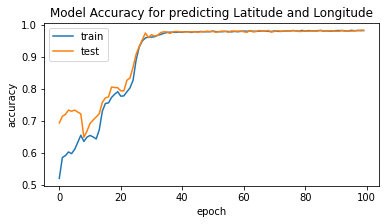

In [0]:
plt.rcParams["figure.figsize"] = (6, 3)
plt.plot(hist_latlong.history['accuracy'])
plt.plot(hist_latlong.history['val_accuracy'])
plt.title('Model Accuracy for predicting Latitude and Longitude')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Normalized

In [0]:
# Normalized
x_train, x_test, y_train, y_test = train_test_split(X, y_lat, test_size=0.3, random_state=45) 

In [0]:
start_time = time.time()

# Define the model
model_3 = Sequential()
model_3.add(Dense(300, input_dim=520, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))
model_3.add(Dense(150, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))
model_3.add(Dense(150, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(2, activation='linear'))
model_3.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])


model_3.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 300)               156300    
_________________________________________________________________
batch_normalization_13 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 150)               45150     
_________________________________________________________________
batch_normalization_14 (Batc (None, 150)               600       
_________________________________________________________________
dropout_10 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 150)              

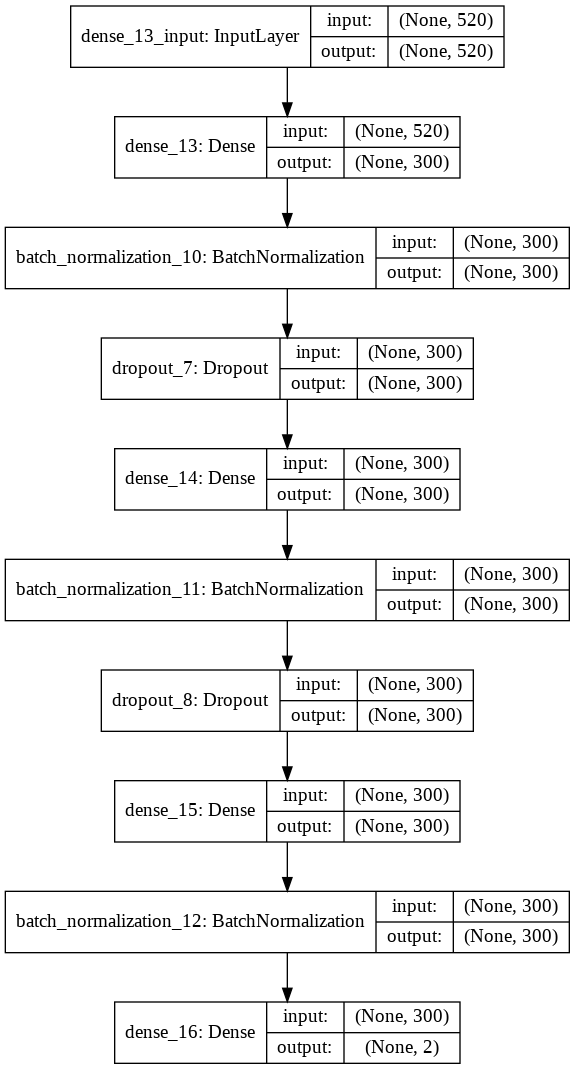

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model_3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
monitor2 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
hist_latlong=model_3.fit(
    x_train,
    y_train,
    batch_size=1024,
    validation_split = 0.4,
    epochs=150,
    shuffle=True,
    callbacks=[monitor2],
    verbose=2,
    validation_data=(x_test,y_test)
)



Train on 13955 samples, validate on 5982 samples
Epoch 1/150
 - 1s - loss: 144.9846 - accuracy: 0.5297 - val_loss: 145.2974 - val_accuracy: 0.4977
Epoch 2/150
 - 0s - loss: 144.7678 - accuracy: 0.5913 - val_loss: 144.9410 - val_accuracy: 0.5042
Epoch 3/150
 - 0s - loss: 144.4620 - accuracy: 0.6146 - val_loss: 144.5379 - val_accuracy: 0.5430
Epoch 4/150
 - 0s - loss: 144.0446 - accuracy: 0.5998 - val_loss: 143.9975 - val_accuracy: 0.5662
Epoch 5/150
 - 0s - loss: 143.4994 - accuracy: 0.5837 - val_loss: 143.4077 - val_accuracy: 0.5799
Epoch 6/150
 - 0s - loss: 142.8151 - accuracy: 0.5813 - val_loss: 142.6729 - val_accuracy: 0.5960
Epoch 7/150
 - 0s - loss: 141.9842 - accuracy: 0.5791 - val_loss: 141.6412 - val_accuracy: 0.6028
Epoch 8/150
 - 0s - loss: 141.0014 - accuracy: 0.6038 - val_loss: 140.3872 - val_accuracy: 0.6215
Epoch 9/150
 - 0s - loss: 139.8638 - accuracy: 0.6200 - val_loss: 138.3801 - val_accuracy: 0.6418
Epoch 10/150
 - 0s - loss: 138.5701 - accuracy: 0.6411 - val_loss: 13

In [0]:
pred = model_3.predict(x_test)

pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)


y_true= np.argmax(y_test,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac1))

Accuracy score: 0.9787696422601136


In [0]:
predictions3 = (model_3.predict(x_test))

# accuracy
print("RMSE of predicting LONGTITUDE = ", mean_absolute_error(y_test[:,0],predictions3[:,0]))
print("RMSE of predicting LATITUDE = ", mean_absolute_error(y_test[:,1],predictions3[:,1]))


print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

RMSE of predicting LONGTITUDE =  6.844451268327625
RMSE of predicting LATITUDE =  4.392335615436718
--- Run time: 0.75 mins ---


In [0]:
print(hist_latlong.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


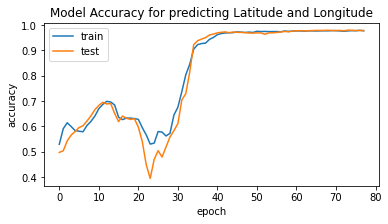

In [0]:
plt.rcParams["figure.figsize"] = (6, 3)
plt.plot(hist_latlong.history['accuracy'])
plt.plot(hist_latlong.history['val_accuracy'])
plt.title('Model Accuracy for predicting Latitude and Longitude')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### CNN

Reshape data for CNN

In [0]:
X_cnn = train_data.copy()
X_cnn = X_cnn.drop([], axis = 1)

Split train and test sets

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_cnn, y3, test_size=0.2, random_state=45) 

In [0]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15949, 1, 525, 1), (15949, 2), (3988, 1, 525, 1), (3988, 2))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , Reshape , ZeroPadding2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D
from keras.optimizers import SGD 

dr = 0.85 # dropout rate (%)
model_lat = tf.keras.models.Sequential()

model_lat.add(Conv2D(64, kernel_size=(1,5), strides=(1,1), input_shape=(1,525,1), activation="relu", name="conv1",))

model_lat.add(MaxPooling2D(pool_size=(1,1)))

model_lat.add(Dropout(dr))

model_lat.add(Dense(300, name="dense1"))

model_lat.add(Dropout(dr))

model_lat.add(Dense(150, name="dense2"))

model_lat.add(Dropout(dr))

model_lat.add(Dense(150, name="dense3"))

model_lat.add(Flatten())
model_lat.add(Dense(2,activation='softmax', name="dense4"))


model_lat.compile(loss='mean_absolute_error', optimizer="RMSprop" , metrics=['accuracy'])

model_lat.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 1, 521, 64)        384       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 521, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 521, 64)        0         
_________________________________________________________________
dense1 (Dense)               (None, 1, 521, 300)       19500     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 521, 300)       0         
_________________________________________________________________
dense2 (Dense)               (None, 1, 521, 150)       45150     
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 521, 150)      

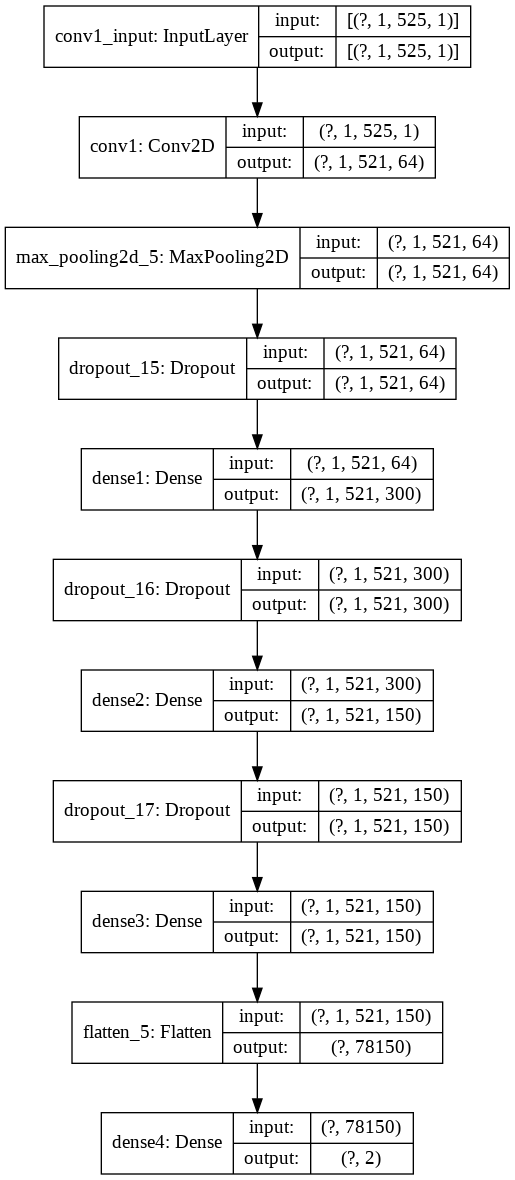

In [0]:
tf.keras.utils.plot_model(
    model_lat,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [0]:
# dr = 0.6
monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
hist_cnn=model_lat.fit(x_train,
    y_train,
    batch_size=1024,
    epochs=100,
    callbacks=[monitor3],
    verbose=2,
    validation_data=(x_test,y_test))

Epoch 1/100
16/16 - 12s - loss: 144.7178 - accuracy: 0.5026 - val_loss: 144.4927 - val_accuracy: 0.5491
Epoch 2/100
16/16 - 11s - loss: 144.7178 - accuracy: 0.5115 - val_loss: 144.4927 - val_accuracy: 0.5491
Epoch 3/100
16/16 - 11s - loss: 144.7179 - accuracy: 0.5078 - val_loss: 144.4927 - val_accuracy: 0.5494
Epoch 4/100
16/16 - 11s - loss: 144.7179 - accuracy: 0.5071 - val_loss: 144.4927 - val_accuracy: 0.5507
Epoch 5/100
16/16 - 11s - loss: 144.7178 - accuracy: 0.5044 - val_loss: 144.4927 - val_accuracy: 0.5507
Epoch 6/100
16/16 - 11s - loss: 144.7179 - accuracy: 0.5131 - val_loss: 144.4927 - val_accuracy: 0.5519
Epoch 7/100
16/16 - 11s - loss: 144.7179 - accuracy: 0.5118 - val_loss: 144.4927 - val_accuracy: 0.5524
Epoch 8/100
16/16 - 11s - loss: 144.7178 - accuracy: 0.5159 - val_loss: 144.4927 - val_accuracy: 0.5527
Epoch 9/100
16/16 - 11s - loss: 144.7178 - accuracy: 0.5101 - val_loss: 144.4927 - val_accuracy: 0.5539
Epoch 10/100
16/16 - 11s - loss: 144.7179 - accuracy: 0.5145 - v

In [0]:
pred = model_lat.predict(x_test)
pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)
y_true= np.argmax(y_test,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score for drop rate 0.6 is {}".format(sac1))

Accuracy score for drop rate 0.6 is 0.5541624874623872


In [0]:
# dr = 0.25
monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
hist_cnn=model_lat.fit(x_train,
    y_train,
    batch_size=1024,
    epochs=100,
    callbacks=[monitor3],
    verbose=2,
    validation_data=(x_test,y_test))

Epoch 1/100
16/16 - 12s - loss: 144.7178 - accuracy: 0.4949 - val_loss: 144.4927 - val_accuracy: 0.5033
Epoch 2/100
16/16 - 11s - loss: 144.7178 - accuracy: 0.5006 - val_loss: 144.4927 - val_accuracy: 0.5030
Epoch 3/100
16/16 - 11s - loss: 144.7178 - accuracy: 0.4943 - val_loss: 144.4927 - val_accuracy: 0.5025
Epoch 4/100
16/16 - 11s - loss: 144.7178 - accuracy: 0.5036 - val_loss: 144.4927 - val_accuracy: 0.5023
Epoch 5/100
16/16 - 11s - loss: 144.7178 - accuracy: 0.4921 - val_loss: 144.4927 - val_accuracy: 0.5023
Epoch 6/100
16/16 - 11s - loss: 144.7178 - accuracy: 0.4966 - val_loss: 144.4927 - val_accuracy: 0.5023
Epoch 7/100
16/16 - 11s - loss: 144.7178 - accuracy: 0.5007 - val_loss: 144.4927 - val_accuracy: 0.5020
Epoch 8/100
16/16 - 12s - loss: 144.7178 - accuracy: 0.4904 - val_loss: 144.4927 - val_accuracy: 0.5020
Epoch 9/100
16/16 - 11s - loss: 144.7179 - accuracy: 0.4922 - val_loss: 144.4927 - val_accuracy: 0.5020
Epoch 10/100
16/16 - 12s - loss: 144.7178 - accuracy: 0.5031 - v

In [0]:
pred = model_lat.predict(x_test)
pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)
y_true= np.argmax(y_test,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score for drop rate 0.25: {}".format(sac1))

Accuracy score for drop rate 0.25: 0.5020060180541625


Best accuracy

In [0]:
# dr = 0.85
monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
hist_cnn=model_lat.fit(x_train,
    y_train,
    batch_size=1024,
    epochs=100,
    callbacks=[monitor3],
    verbose=2,
    validation_data=(x_test,y_test))

Epoch 1/100
16/16 - 9s - loss: 144.7179 - accuracy: 0.5021 - val_loss: 144.4927 - val_accuracy: 0.6058
Epoch 2/100
16/16 - 9s - loss: 144.7179 - accuracy: 0.5160 - val_loss: 144.4927 - val_accuracy: 0.6058
Epoch 3/100
16/16 - 9s - loss: 144.7179 - accuracy: 0.5379 - val_loss: 144.4927 - val_accuracy: 0.6058
Epoch 4/100
16/16 - 9s - loss: 144.7179 - accuracy: 0.5506 - val_loss: 144.4927 - val_accuracy: 0.6058
Epoch 5/100
16/16 - 9s - loss: 144.7178 - accuracy: 0.5822 - val_loss: 144.4927 - val_accuracy: 0.6058
Epoch 6/100
16/16 - 9s - loss: 144.7178 - accuracy: 0.5804 - val_loss: 144.4927 - val_accuracy: 0.6058
Epoch 7/100
16/16 - 8s - loss: 144.7178 - accuracy: 0.5841 - val_loss: 144.4927 - val_accuracy: 0.6058
Epoch 8/100
16/16 - 9s - loss: 144.7179 - accuracy: 0.6004 - val_loss: 144.4927 - val_accuracy: 0.6058
Epoch 9/100
16/16 - 8s - loss: 144.7178 - accuracy: 0.6057 - val_loss: 144.4927 - val_accuracy: 0.6058
Epoch 10/100
16/16 - 8s - loss: 144.7178 - accuracy: 0.6057 - val_loss: 1

In [0]:
pred = model_lat.predict(x_test)
pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)
y_true= np.argmax(y_test,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac1))

Accuracy score: 0.6058174523570712


### LSTM

In [0]:
def to_sequences(seq_size, data1, data2):
    x = []
    
    y = []

    for i in range(len(data1)-seq_size):
        #print(i)
        window = data1[i:(i+seq_size)]
        after_window = data2[i+seq_size]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x), np.array(y)

In [0]:
train_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,241.44531,175.7782,2,1,106,2
1,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,236.80221,189.2252,2,1,106,2
2,-5,-5,-5,-5,-5,-5,-5,8,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,219.33341,204.5322,2,1,103,2
3,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,13,-5,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,224.75141,189.0930,2,1,102,2
4,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,332.32461,237.2171,0,0,122,2


In [0]:
SEQUENCE_SIZE = 1

x_lat1,y_lat1 = to_sequences(SEQUENCE_SIZE,X3,y3)

In [0]:
x_lat1.shape,y_lat1.shape

((19936, 1, 1, 525), (19936, 2))

In [0]:
x_lat1=np.reshape(x_lat,(19936,1,525))

In [0]:
x_lat1.shape[2], y3.shape[1]

(525, 2)

In [0]:
 X_trainls, X_testls, y_trainls, y_testls = train_test_split(x_lat1, y_lat1, test_size=0.3, random_state=42)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

modellong = tf.keras.models.Sequential()

modellong.add(LSTM(64,dropout=0.1, recurrent_dropout=0.1,  input_shape=(1,525),activation ='relu'))
modellong.add(Dense(200))
modellong.add(Dense(100))
modellong.add(Dense(y3.shape[1]))



modellong.compile(loss='categorical_crossentropy', optimizer='RMSprop')
modellong.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                151040    
_________________________________________________________________
dense (Dense)                (None, 200)               13000     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 184,342
Trainable params: 184,342
Non-trainable params: 0
_________________________________________________________________


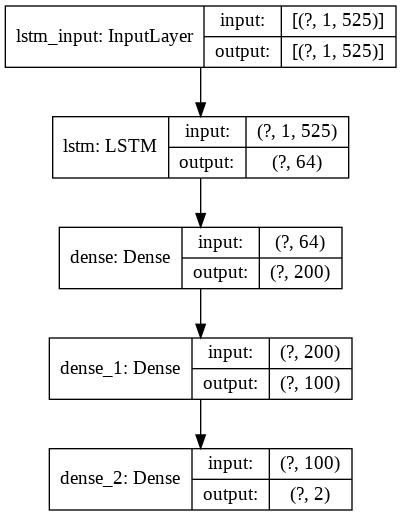

In [0]:
tf.keras.utils.plot_model(
    modellong,
    to_file="model_lstm.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


modellong.fit(X_trainls,y_trainls,validation_data=(X_testls,y_testls), callbacks=[monitor],verbose=2,epochs = 100)

Epoch 1/100
437/437 - 6s - loss: 199.5115 - val_loss: 191.1940
Epoch 2/100
437/437 - 6s - loss: 193.1911 - val_loss: 192.9140
Epoch 3/100
437/437 - 6s - loss: 193.0657 - val_loss: 191.1151
Epoch 4/100
437/437 - 6s - loss: 193.0216 - val_loss: 191.0266
Epoch 5/100
437/437 - 6s - loss: 192.9656 - val_loss: 191.0207
Epoch 6/100
437/437 - 6s - loss: 192.9487 - val_loss: 190.9773
Epoch 7/100
437/437 - 6s - loss: 192.9179 - val_loss: 190.9770
Epoch 8/100
437/437 - 6s - loss: 192.9084 - val_loss: 190.8759
Epoch 9/100
437/437 - 6s - loss: 192.8684 - val_loss: 190.9406
Epoch 10/100
437/437 - 6s - loss: 192.8544 - val_loss: 190.8207
Epoch 11/100
437/437 - 6s - loss: 192.8387 - val_loss: 190.8114
Epoch 12/100
437/437 - 6s - loss: 192.8268 - val_loss: 190.8376
Epoch 13/100
437/437 - 6s - loss: 192.8048 - val_loss: 190.8659
Epoch 14/100
437/437 - 6s - loss: 192.8044 - val_loss: 191.7493
Epoch 15/100
437/437 - 6s - loss: 192.7823 - val_loss: 191.0168
Epoch 16/100
437/437 - 7s - loss: 192.7831 - val_

In [0]:
pred = modellong.predict(X_testls)

pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)


y_true= np.argmax(y_testls,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac1))

Accuracy score: 0.9406453770272529


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X, y_lat);

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(X)
# Calculate the absolute errors
errors = abs(predictions - y_lat)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.22 degrees.


In [0]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_lat)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.63 %.


# Predicting Space (SE) 

### Neural Network

Normalized

In [0]:
# Normalized
x_train, x_test, y_train, y_test = train_test_split(X, y_se, test_size=0.3, random_state=45) 

In [0]:
# from tensorflow.keras.layers import Dropout, BatchNormalization

# Define the model
model_2 = Sequential()
model_2.add(Dense(256, input_dim=522, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(200))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(120))
model_2.add(BatchNormalization())
model_2.add(Dense(123, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model_2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               133888    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               51400     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

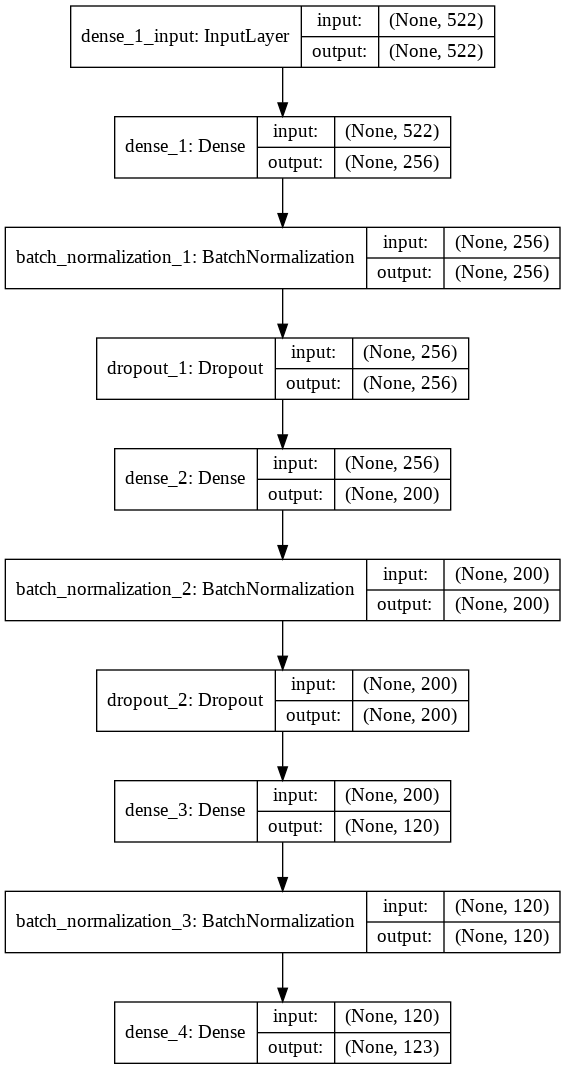

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model_2, to_file='model_space.png', show_shapes=True, show_layer_names=True)

In [0]:
monitor2 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
hist_latlong=model_2.fit(
    x_train,
    y_train,
    batch_size=1024,
    validation_split = 0.4,
    epochs=150,
    shuffle=True,
    callbacks=[monitor2],
    verbose=2,
    validation_data=(x_test,y_test)
)



Train on 13955 samples, validate on 5982 samples
Epoch 1/150
 - 1s - loss: 4.8572 - accuracy: 0.0372 - val_loss: 4.1608 - val_accuracy: 0.1122
Epoch 2/150
 - 0s - loss: 4.0804 - accuracy: 0.1067 - val_loss: 3.4621 - val_accuracy: 0.1643
Epoch 3/150
 - 0s - loss: 3.5664 - accuracy: 0.1453 - val_loss: 3.0362 - val_accuracy: 0.1994
Epoch 4/150
 - 0s - loss: 3.2158 - accuracy: 0.1801 - val_loss: 2.7657 - val_accuracy: 0.2295
Epoch 5/150
 - 0s - loss: 2.9794 - accuracy: 0.2127 - val_loss: 2.5815 - val_accuracy: 0.2668
Epoch 6/150
 - 0s - loss: 2.7894 - accuracy: 0.2430 - val_loss: 2.4442 - val_accuracy: 0.2966
Epoch 7/150
 - 0s - loss: 2.6350 - accuracy: 0.2641 - val_loss: 2.3385 - val_accuracy: 0.3191
Epoch 8/150
 - 0s - loss: 2.5116 - accuracy: 0.2845 - val_loss: 2.2458 - val_accuracy: 0.3444
Epoch 9/150
 - 0s - loss: 2.4016 - accuracy: 0.3046 - val_loss: 2.1727 - val_accuracy: 0.3564
Epoch 10/150
 - 0s - loss: 2.2994 - accuracy: 0.3273 - val_loss: 2.0993 - val_accuracy: 0.3810
Epoch 11/1

In [0]:
pred = model_2.predict(x_test)

pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)


y_true= np.argmax(y_test,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac1))

Accuracy score: 0.6031427616181879


In [0]:
print(hist_latlong.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


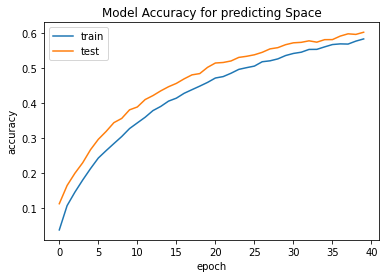

In [0]:
plt.plot(hist_latlong.history['accuracy'])
plt.plot(hist_latlong.history['val_accuracy'])
plt.title('Model Accuracy for predicting Space')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### CNN

Reshape data for CNN

In [0]:
X_cnn = train_data.copy()
X_cnn = X_cnn.drop([], axis = 1)

Split train and test sets

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_cnn, y_se, test_size=0.2, random_state=45) 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , Reshape , ZeroPadding2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D

dr = 0.5 # dropout rate (%)
model = tf.keras.models.Sequential()
 
model.add(Conv2D(64, kernel_size=(1,5), strides=(1,1), input_shape=(1,520,1), activation="relu", name="conv1",))

model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dropout(dr))


model.add(Dense(150,  name="dense1"))

model.add(Dense(150, name="dense2"))


model.add(Dense(1,activation='softmax', name="dense3"))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 1, 516, 64)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 516, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33024)             0         
_________________________________________________________________
dropout (Dropout)            (None, 33024)             0         
_________________________________________________________________
dense1 (Dense)               (None, 150)               4953750   
_________________________________________________________________
dense2 (Dense)               (None, 150)               22650     
_________________________________________________________________
dense3 (Dense)               (None, 1)                 1

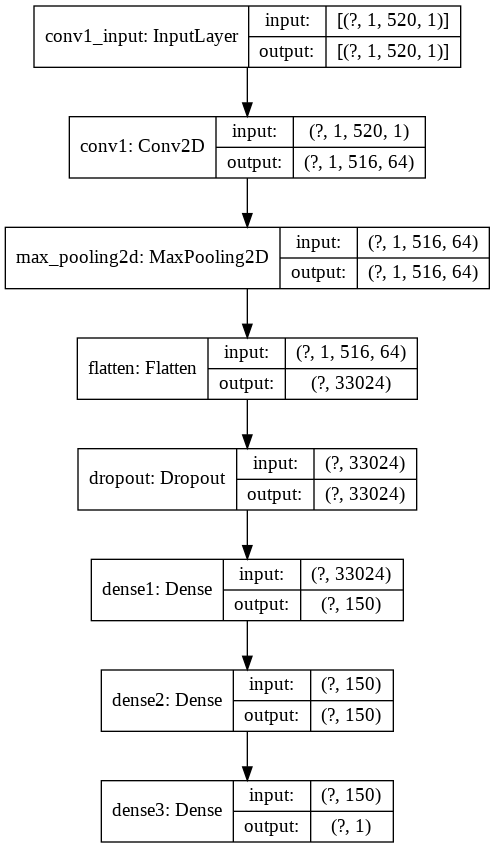

In [0]:
tf.keras.utils.plot_model(
    model,
    to_file="modelcnn.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [0]:
#when dr = 0.5
monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
hist_cnn=model.fit(x_train,
    y_train,
    batch_size=1024,
    epochs=100,
    callbacks=[monitor3],
    verbose=2,
    validation_data=(x_test,y_test))

Epoch 1/100
16/16 - 1s - loss: 3.8517 - accuracy: 0.1339 - val_loss: 3.2158 - val_accuracy: 0.2139
Epoch 2/100
16/16 - 1s - loss: 2.8104 - accuracy: 0.2745 - val_loss: 2.6764 - val_accuracy: 0.2899
Epoch 3/100
16/16 - 1s - loss: 2.3580 - accuracy: 0.3425 - val_loss: 2.3981 - val_accuracy: 0.3423
Epoch 4/100
16/16 - 1s - loss: 2.1164 - accuracy: 0.3899 - val_loss: 2.2283 - val_accuracy: 0.3691
Epoch 5/100
16/16 - 1s - loss: 1.9519 - accuracy: 0.4255 - val_loss: 2.0928 - val_accuracy: 0.4005
Epoch 6/100
16/16 - 1s - loss: 1.8306 - accuracy: 0.4519 - val_loss: 2.0476 - val_accuracy: 0.4110
Epoch 7/100
16/16 - 1s - loss: 1.7538 - accuracy: 0.4689 - val_loss: 1.9421 - val_accuracy: 0.4401
Epoch 8/100
16/16 - 1s - loss: 1.6715 - accuracy: 0.4904 - val_loss: 1.8942 - val_accuracy: 0.4448
Epoch 9/100
16/16 - 1s - loss: 1.5926 - accuracy: 0.5108 - val_loss: 1.8521 - val_accuracy: 0.4634
Epoch 10/100
16/16 - 1s - loss: 1.5461 - accuracy: 0.5225 - val_loss: 1.8094 - val_accuracy: 0.4799
Epoch 11/

In [0]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)
y_true= np.argmax(y_test,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac1))

Accuracy score: 0.574974924774323


In [0]:
# when dr = 0.3
monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=1, mode='auto')
hist_cnn=model.fit(x_train,
    y_train,
    batch_size=1024,
    epochs=100,
    callbacks=[monitor3],
    verbose=2,
    validation_data=(x_test,y_test))

Epoch 1/100
16/16 - 1s - loss: 3.6182 - accuracy: 0.1678 - val_loss: 2.8478 - val_accuracy: 0.2590
Epoch 2/100
16/16 - 1s - loss: 2.4361 - accuracy: 0.3401 - val_loss: 2.3420 - val_accuracy: 0.3568
Epoch 3/100
16/16 - 1s - loss: 1.9880 - accuracy: 0.4174 - val_loss: 2.1250 - val_accuracy: 0.3894
Epoch 4/100
16/16 - 1s - loss: 1.7622 - accuracy: 0.4653 - val_loss: 2.0230 - val_accuracy: 0.4220
Epoch 5/100
16/16 - 1s - loss: 1.6276 - accuracy: 0.5037 - val_loss: 1.9316 - val_accuracy: 0.4473
Epoch 6/100
16/16 - 1s - loss: 1.5224 - accuracy: 0.5272 - val_loss: 1.8661 - val_accuracy: 0.4549
Epoch 7/100
16/16 - 1s - loss: 1.4425 - accuracy: 0.5508 - val_loss: 1.8005 - val_accuracy: 0.4835
Epoch 8/100
16/16 - 1s - loss: 1.3753 - accuracy: 0.5714 - val_loss: 1.7941 - val_accuracy: 0.4895
Epoch 9/100
16/16 - 1s - loss: 1.3381 - accuracy: 0.5891 - val_loss: 1.7670 - val_accuracy: 0.5088
Epoch 10/100
16/16 - 1s - loss: 1.2884 - accuracy: 0.5993 - val_loss: 1.7621 - val_accuracy: 0.5231
Epoch 11/

In [0]:
pred = model.predict(x_test)

pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)


y_true= np.argmax(y_test,axis=1) 
sac2 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac2))

Accuracy score: 0.6228686058174524


### LSTM for SPACE

In [0]:
SEQUENCE_SIZE = 1
x_LSTM,y_LSTM = to_sequences(SEQUENCE_SIZE,X,y_se) 

In [0]:
 X_trainls, X_testls, y_trainls, y_testls = train_test_split(x_LSTM, y_LSTM, test_size=0.3, random_state=33)

In [0]:
modellstm = Sequential()

modellstm.add(LSTM(16,dropout=0.3, recurrent_dropout=0.3,  input_shape=(1,520),activation ='relu'))
modellstm.add(Dense(150))
modellstm.add(Dense(50))
modellstm.add(Dense(1))

modellstm.compile(loss='binary_crossentropy', optimizer='adam')
modellstm.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 16)                34368     
_________________________________________________________________
dense_20 (Dense)             (None, 150)               2550      
_________________________________________________________________
dense_21 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
Total params: 44,519
Trainable params: 44,519
Non-trainable params: 0
_________________________________________________________________


In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=7, verbose=1, mode='auto')


modellstm.fit(X_trainls,y_trainls,validation_data=(X_testls,y_testls), callbacks=[monitor],verbose=2,epochs = 150)

Epoch 1/150
437/437 - 6s - loss: 0.1063 - val_loss: 0.0958
Epoch 2/150
437/437 - 6s - loss: 0.0928 - val_loss: 0.0900
Epoch 3/150
437/437 - 6s - loss: 0.0903 - val_loss: 0.0916
Epoch 4/150
437/437 - 6s - loss: 0.0953 - val_loss: 0.0890
Epoch 5/150
437/437 - 6s - loss: 0.0864 - val_loss: 0.0862
Epoch 6/150
437/437 - 5s - loss: 0.0870 - val_loss: 0.0842
Epoch 7/150
437/437 - 6s - loss: 0.0906 - val_loss: 0.0899
Epoch 8/150
437/437 - 6s - loss: 0.0960 - val_loss: 0.1224
Epoch 9/150
437/437 - 5s - loss: 0.0921 - val_loss: 0.0861
Epoch 10/150
437/437 - 6s - loss: 0.0896 - val_loss: 0.0830
Epoch 11/150
437/437 - 6s - loss: 0.0868 - val_loss: 0.0864
Epoch 12/150
437/437 - 6s - loss: 0.1015 - val_loss: 0.1469
Epoch 13/150
437/437 - 6s - loss: 0.1105 - val_loss: 0.0912
Epoch 14/150
437/437 - 6s - loss: 0.0890 - val_loss: 0.0855
Epoch 15/150
437/437 - 6s - loss: 0.0859 - val_loss: 0.0861
Epoch 16/150
437/437 - 6s - loss: 0.0850 - val_loss: 0.0831
Epoch 17/150
437/437 - 6s - loss: 0.0821 - val_lo

In [0]:
pred = modellstm.predict(X_testls)

pred = np.argmax(pred,axis=1) 

y_true= np.argmax(y_testls,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac1))

Accuracy score: 0.030262497910048487


### Random *Forest* SPACE

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = { "n_estimators" : [100,200],  "max_depth": [100, 500,700]}

random = RandomForestClassifier()

rfgridsearch = GridSearchCV(random, parameters,cv=3, verbose=5)
rfgridsearch.fit(x_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=100, n_estimators=100, score=0.512, total=  49.5s
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.5s remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=100, score=0.501, total=  48.8s
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=100, score=0.517, total=  38.9s
[CV] max_depth=100, n_estimators=200 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=200, score=0.512, total= 1.3min
[CV] max_depth=100, n_estimators=200 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.6min remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=200, score=0.508, total= 1.4min
[CV] max_depth=100, n_estimators=200 .................................
[CV] ..... max_depth=100, n_estimators=200, score=0.518, total= 1.4min
[CV] max_depth=500, n_estimators=100 .................................
[CV] ..... max_depth=500, n_estimators=100, score=0.514, total=  44.8s
[CV] max_depth=500, n_estimators=100 .................................
[CV] ..... max_depth=500, n_estimators=100, score=0.504, total=  42.8s
[CV] max_depth=500, n_estimators=100 .................................
[CV] ..... max_depth=500, n_estimators=100, score=0.513, total=  51.7s
[CV] max_depth=500, n_estimators=200 .................................
[CV] ..... max_depth=500, n_estimators=200, score=0.510, total= 1.5min
[CV] max_depth=500, n_estimators=200 .................................
[CV] ..... max_depth=500, n_estimators=200, score=0.503, total= 1.4min
[CV] max_depth=500, n_estimators=200 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 19.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [0]:
x_test = np.reshape(x_test,(3988,522)) #need to be removed

In [0]:
y_pred = rfgridsearch.predict(x_test)
print('Best parameters: ', rfgridsearch.best_params_)
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))

Best parameters:  {'max_depth': 100, 'n_estimators': 200}
Accuracy score:  0.5970411233701103


# Predicting Relative Position (RP)

In [0]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y_rp, test_size=0.3, random_state=42)

### Neural Network

In [0]:
start_time = time.time()

# Define the model
model_rp = Sequential()
model_rp.add(Dense(300, input_dim=520, activation='relu'))
model_rp.add(BatchNormalization())
model_rp.add(Dropout(0.3))
model_rp.add(Dense(150, activation='relu'))
model_rp.add(BatchNormalization())
model_rp.add(Dropout(0.3))
model_rp.add(Dense(300, activation='relu'))
model_rp.add(BatchNormalization())
model_rp.add(Dense(2, activation='linear'))
model_rp.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])


model_rp.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 300)               156300    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dropout_21 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 150)               45150     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               600       
_________________________________________________________________
dropout_22 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 300)             

In [0]:
monitor2 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=7, verbose=1, mode='auto')
hist_rp=model_rp.fit(
    x_train1,
    y_train1,
    batch_size=700,
    validation_split = 0.2,
    epochs=150,
    shuffle=True,
    callbacks=[monitor2],
    verbose=2,
    validation_data=(x_test1,y_test1)
)

Epoch 1/150
16/16 - 0s - loss: 0.7779 - accuracy: 0.6024 - val_loss: 0.5313 - val_accuracy: 0.5428
Epoch 2/150
16/16 - 0s - loss: 0.5132 - accuracy: 0.7335 - val_loss: 0.3739 - val_accuracy: 0.7918
Epoch 3/150
16/16 - 0s - loss: 0.3978 - accuracy: 0.8092 - val_loss: 0.3092 - val_accuracy: 0.8277
Epoch 4/150
16/16 - 0s - loss: 0.3334 - accuracy: 0.8356 - val_loss: 0.2930 - val_accuracy: 0.8295
Epoch 5/150
16/16 - 0s - loss: 0.3000 - accuracy: 0.8401 - val_loss: 0.2627 - val_accuracy: 0.8305
Epoch 6/150
16/16 - 0s - loss: 0.2657 - accuracy: 0.8449 - val_loss: 0.2303 - val_accuracy: 0.8352
Epoch 7/150
16/16 - 0s - loss: 0.2429 - accuracy: 0.8504 - val_loss: 0.2270 - val_accuracy: 0.8234
Epoch 8/150
16/16 - 0s - loss: 0.2305 - accuracy: 0.8495 - val_loss: 0.2240 - val_accuracy: 0.8262
Epoch 9/150
16/16 - 0s - loss: 0.2122 - accuracy: 0.8587 - val_loss: 0.2005 - val_accuracy: 0.8488
Epoch 10/150
16/16 - 0s - loss: 0.2032 - accuracy: 0.8587 - val_loss: 0.2082 - val_accuracy: 0.8506
Epoch 11/

In [0]:

pred = model_rp.predict(x_test1)

pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)

y_true= np.argmax(y_test1,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac1))


Accuracy score: 0.92744901370779


### CNN

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y_rp, test_size=0.25, random_state=42)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


tf.__version__
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , Reshape , ZeroPadding2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D

dr = 0.4 # dropout rate (%)
model_rpcnn = tf.keras.models.Sequential()
 
model_rpcnn.add(Conv2D(64, kernel_size=(1,5), strides=(1,1), input_shape=(1,520,1), activation="relu", name="conv1",))

model_rpcnn.add(MaxPooling2D(pool_size=(1,1)))
model_rpcnn.add(Flatten())
model_rpcnn.add(Dropout(dr))


model_rpcnn.add(Dense(300, name="dense1"))

model_rpcnn.add(Dense(150, name="dense2"))
#model.add(Flatten())
model_rpcnn.add(Dense(2,activation='softmax', name="dense3"))

model_rpcnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rpcnn.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 1, 516, 64)        384       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 516, 64)        0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 33024)             0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 33024)             0         
_________________________________________________________________
dense1 (Dense)               (None, 300)               9907500   
_________________________________________________________________
dense2 (Dense)               (None, 150)               45150     
_________________________________________________________________
dense3 (Dense)               (None, 2)               

In [0]:
monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')

In [0]:
hist_rpcnn=model_rpcnn.fit(X_train,
    y_train,
    batch_size=1024,
    epochs=150,
    callbacks=[monitor],
    verbose=2,
    validation_data=(X_test,y_test))

Epoch 1/150
15/15 - 1s - loss: 1.5241 - accuracy: 0.7860 - val_loss: 0.4592 - val_accuracy: 0.8203
Epoch 2/150
15/15 - 1s - loss: 0.4011 - accuracy: 0.8404 - val_loss: 0.3384 - val_accuracy: 0.8397
Epoch 3/150
15/15 - 1s - loss: 0.3251 - accuracy: 0.8542 - val_loss: 0.3101 - val_accuracy: 0.8570
Epoch 4/150
15/15 - 1s - loss: 0.3045 - accuracy: 0.8630 - val_loss: 0.3026 - val_accuracy: 0.8582
Epoch 5/150
15/15 - 1s - loss: 0.2930 - accuracy: 0.8676 - val_loss: 0.2932 - val_accuracy: 0.8696
Epoch 6/150
15/15 - 1s - loss: 0.2823 - accuracy: 0.8785 - val_loss: 0.2866 - val_accuracy: 0.8724
Epoch 7/150
15/15 - 1s - loss: 0.2741 - accuracy: 0.8824 - val_loss: 0.2808 - val_accuracy: 0.8796
Epoch 8/150
15/15 - 1s - loss: 0.2679 - accuracy: 0.8880 - val_loss: 0.2796 - val_accuracy: 0.8772
Epoch 9/150
15/15 - 1s - loss: 0.2692 - accuracy: 0.8825 - val_loss: 0.2752 - val_accuracy: 0.8806
Epoch 10/150
15/15 - 1s - loss: 0.2624 - accuracy: 0.8857 - val_loss: 0.2708 - val_accuracy: 0.8810
Epoch 11/

In [0]:
pred = model_rpcnn.predict(X_test)

pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)


y_true= np.argmax(y_test,axis=1) 
sac3 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac3))

Accuracy score: 0.8924774322968907


### LSTM 

In [0]:
SEQUENCE_SIZE = 1

#y5 is same as y_rp as we did sequences , y_rp is changed
x_rp,y_rp = to_sequences(SEQUENCE_SIZE,X,y5)

In [0]:
 X_trainls, X_testls, y_trainls, y_testls = train_test_split(x_rp, y_rp, test_size=0.25, random_state=33)

In [0]:
modellsrp = Sequential()

modellsrp.add(LSTM(64,dropout=0.1, recurrent_dropout=0.1,  input_shape=(1,520),activation ='relu'))
modellsrp.add(Dense(400))
modellsrp.add(Dense(200))
modellsrp.add(Dense(2))



modellsrp.compile(loss='categorical_crossentropy', optimizer='adam')
modellsrp.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 64)                149760    
_________________________________________________________________
dense_51 (Dense)             (None, 400)               26000     
_________________________________________________________________
dense_52 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 402       
Total params: 256,362
Trainable params: 256,362
Non-trainable params: 0
_________________________________________________________________


In [0]:
monitor4 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')

modellsrp.fit(X_trainls,y_trainls,validation_data=(X_testls,y_testls), callbacks=[monitor4],verbose=2,epochs = 150)

Epoch 1/150
468/468 - 6s - loss: 0.5874 - val_loss: 0.4163
Epoch 2/150
468/468 - 6s - loss: 0.4537 - val_loss: 0.4682
Epoch 3/150
468/468 - 6s - loss: 0.4777 - val_loss: 0.4665
Epoch 4/150
468/468 - 6s - loss: 0.4036 - val_loss: 0.4459
Epoch 5/150
468/468 - 6s - loss: 0.3893 - val_loss: 0.4143
Epoch 6/150
468/468 - 6s - loss: 0.3858 - val_loss: 0.3703
Epoch 7/150
468/468 - 6s - loss: 0.3562 - val_loss: 0.4041
Epoch 8/150
468/468 - 7s - loss: 0.3975 - val_loss: 0.4073
Epoch 9/150
468/468 - 6s - loss: 0.5295 - val_loss: 0.4451
Epoch 10/150
468/468 - 6s - loss: 0.4920 - val_loss: 0.4646
Epoch 11/150
468/468 - 6s - loss: 0.4646 - val_loss: 0.4399
Epoch 12/150
468/468 - 6s - loss: 0.4953 - val_loss: 0.4702
Epoch 13/150
468/468 - 6s - loss: 0.4698 - val_loss: 0.4578
Epoch 14/150
468/468 - 6s - loss: 0.4628 - val_loss: 0.4458
Epoch 15/150
468/468 - 6s - loss: 0.4717 - val_loss: 0.4509
Epoch 16/150
468/468 - 6s - loss: 0.4694 - val_loss: 0.4410
Epoch 00016: early stopping


In [0]:
X_testls=np.reshape(X_testls,(4984,1,520))

In [0]:
pred = modellsrp.predict(X_testls)

pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)


y_true= np.argmax(y_testls,axis=1) 
sac1 = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(sac1))

Accuracy score: 0.744983948635634


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier 
parameters = { "n_estimators" : [100, 200], "max_depth": [100, 1000]}

random_rp = RandomForestClassifier()



rfgridsearch = GridSearchCV(random_rp, parameters,cv=3, verbose=5)
rfgridsearch.fit(x_train1, y_train1)
y_pred = rfgridsearch.predict(x_test1)
print('Best parameters: ', rfgridsearch.best_params_)
print('Accuracy score: ', format(accuracy_score(y_test1, y_pred)))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=100, n_estimators=100, score=0.959, total=   2.7s
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=100, score=0.954, total=   2.5s
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=100, score=0.953, total=   2.6s
[CV] max_depth=100, n_estimators=200 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=200, score=0.957, total=   5.3s
[CV] max_depth=100, n_estimators=200 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.2s remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=200, score=0.954, total=   5.3s
[CV] max_depth=100, n_estimators=200 .................................
[CV] ..... max_depth=100, n_estimators=200, score=0.955, total=   8.2s
[CV] max_depth=1000, n_estimators=100 ................................
[CV] .... max_depth=1000, n_estimators=100, score=0.959, total=   4.3s
[CV] max_depth=1000, n_estimators=100 ................................
[CV] .... max_depth=1000, n_estimators=100, score=0.955, total=   4.3s
[CV] max_depth=1000, n_estimators=100 ................................
[CV] .... max_depth=1000, n_estimators=100, score=0.955, total=   4.4s
[CV] max_depth=1000, n_estimators=200 ................................
[CV] .... max_depth=1000, n_estimators=200, score=0.958, total=   6.2s
[CV] max_depth=1000, n_estimators=200 ................................
[CV] .... max_depth=1000, n_estimators=200, score=0.955, total=   5.8s
[CV] max_depth=1000, n_estimators=200 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   58.5s finished


Best parameters:  {'max_depth': 1000, 'n_estimators': 200}
Accuracy score:  0.964560347709796


# Future Works


**We have few approaches in mind:**

*   Using Data Augmentation to enhance the dataset
*   Using K-fold Cross Validation

